Peton Manning (https://facebook.github.io/prophet/docs/saturating_forecasts.html)

In [1]:
import pandas as pd
import numpy as np

In [2]:
cap = 12
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df['cap'] = cap

In [3]:
train_df = df.iloc[:len(df)-581,:]
test_df = df.iloc[len(df)-581:,:]

In [4]:
print(train_df.tail())
test_df.head()

              ds         y  cap
2319  2014-06-11  7.439559   12
2320  2014-06-12  7.707962   12
2321  2014-06-13  7.350516   12
2322  2014-06-14  7.322510   12
2323  2014-06-15  7.285507   12


,ds,y,cap
2324,2014-06-16,7.367709,12
2325,2014-06-17,7.267525,12
2326,2014-06-18,7.224753,12
2327,2014-06-19,7.222566,12
2328,2014-06-20,7.351800,12


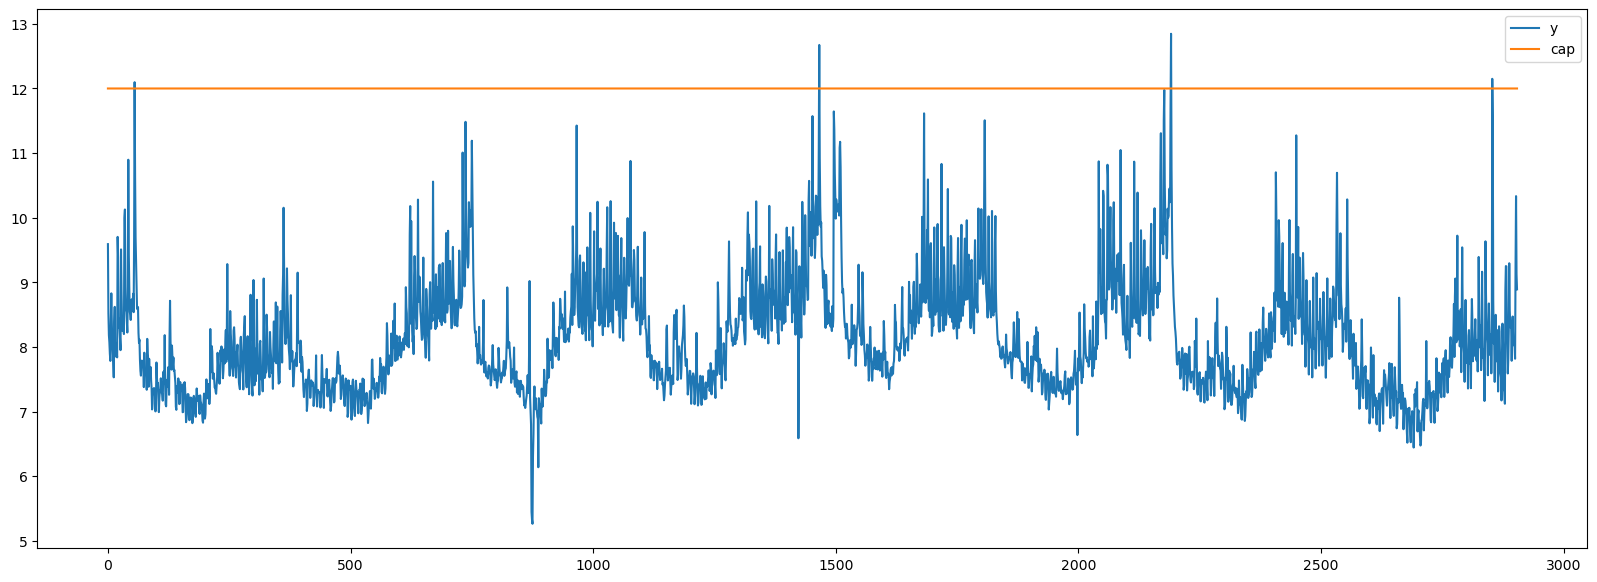

In [5]:
df.plot(figsize=(20,7));

In [7]:
df.head()

,ds,y,cap
0,2007-12-10,9.590761,12
1,2007-12-11,8.519590,12
2,2007-12-12,8.183677,12
3,2007-12-13,8.072467,12
4,2007-12-14,7.893572,12


In [6]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [7]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

11:09:55 - cmdstanpy - INFO - Chain [1] start processing
11:09:58 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


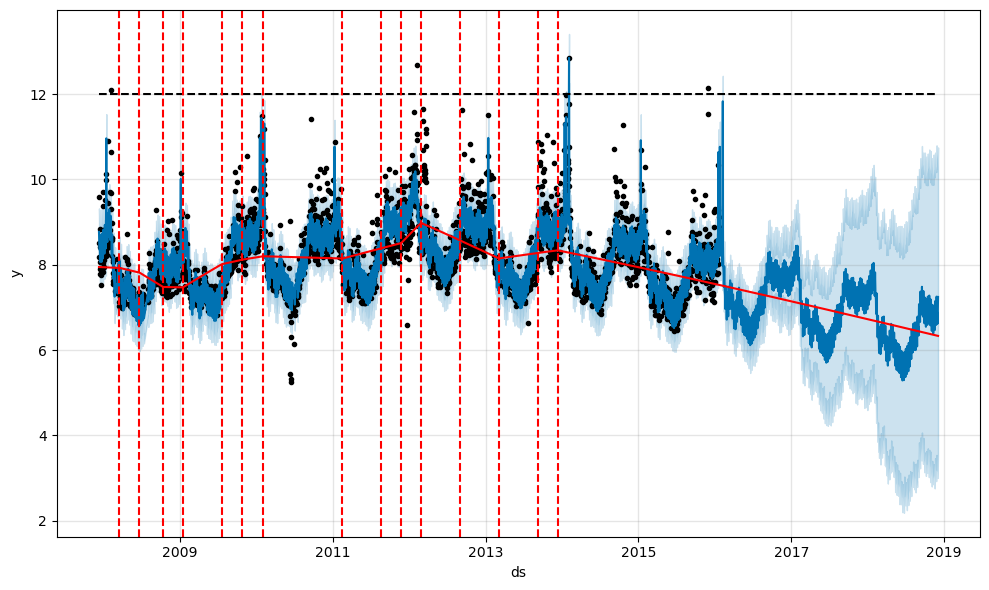

In [11]:
m = Prophet(growth="logistic" ,  changepoint_prior_scale=0.5,holidays=holidays , interval_width=0.8)
# m.add_country_holidays(country_name='US')
m.fit(df)
future = m.make_future_dataframe(periods=1048)
future['cap'] = cap
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca() , m , fcst)

c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To 

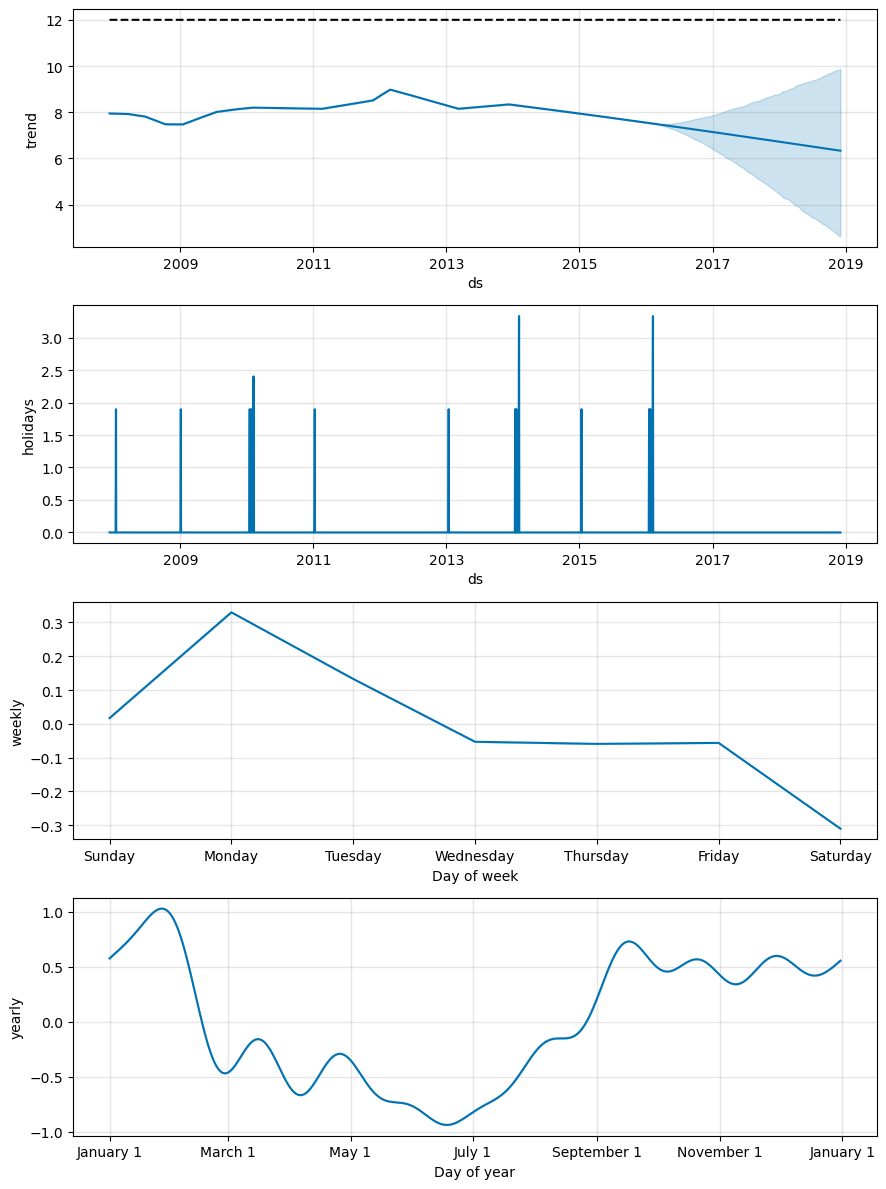

In [12]:
m.plot_components(fcst);